In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore") 
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, VotingClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from lightgbm import LGBMClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline

In [2]:
df = pd.read_csv('RTA Dataset.csv')
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [3]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset')

There are 12316 rows and 32 columns in the dataset


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

- Few features seem to have missing values, which would need to be dealth with before modelling.

- Time data type is object which would also need to be converted to date time.

In [5]:
df.describe(include = 'O').T

,count,unique,top,freq
Time,12316,1074,15:30:00,120
Day_of_week,12316,7,Friday,2041
Age_band_of_driver,12316,5,18-30,4271
Sex_of_driver,12316,3,Male,11437
Educational_level,11575,7,Junior high school,7619
Vehicle_driver_relation,11737,4,Employee,9627
Driving_experience,11487,7,5-10yr,3363
Type_of_vehicle,11366,17,Automobile,3205
Owner_of_vehicle,11834,4,Owner,10459
Service_year_of_vehicle,8388,6,Unknown,2883


### Checking Distribution of Target Variable

In [6]:
c = df['Accident_severity'].value_counts()
p = np.round(100*df['Accident_severity'].value_counts()/len(df['Accident_severity']), 2)
pd.concat([c, p], axis = 1)

,Accident_severity,Accident_severity
Slight Injury,10415,84.56
Serious Injury,1743,14.15
Fatal injury,158,1.28


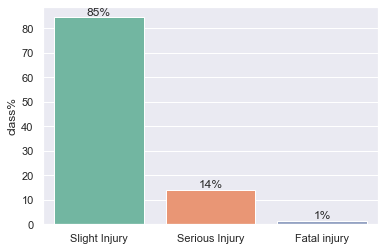

In [7]:
ax = sns.barplot(x = df['Accident_severity'].value_counts().index,
                            y = 100*df['Accident_severity'].value_counts(normalize = True).values,
                            data = df, palette = 'Set2')
ax.bar_label(ax.containers[0], fmt='%.f%%')
ax.set_ylabel('class%')
plt.show()

There is a significant class imbalance in the target variable with 85% cases of Slight injury, 14% of Serious injury and just 1% of Fatal injury.

In [8]:
# Check missing values
c = df.isnull().sum()
p = np.round(100*df.isnull().sum()/len(df), 2)
pd.concat([c, p], axis = 1, keys = ['counts', '%age'])

,counts,%age
Time,0,0.00
Day_of_week,0,0.00
Age_band_of_driver,0,0.00
Sex_of_driver,0,0.00
Educational_level,741,6.02
Vehicle_driver_relation,579,4.70
Driving_experience,829,6.73
Type_of_vehicle,950,7.71
Owner_of_vehicle,482,3.91
Service_year_of_vehicle,3928,31.89


In [9]:
def feat_typ(data): # divide dataset according to feature types
    obj = data.select_dtypes(exclude = np.number).columns.to_list()
    data_obj = data[obj] # dataframe of categorical features
    num = data.select_dtypes(include = np.number).columns.to_list()
    data_num = data[num] # dataframe of numerical features
    return data_obj, data_num

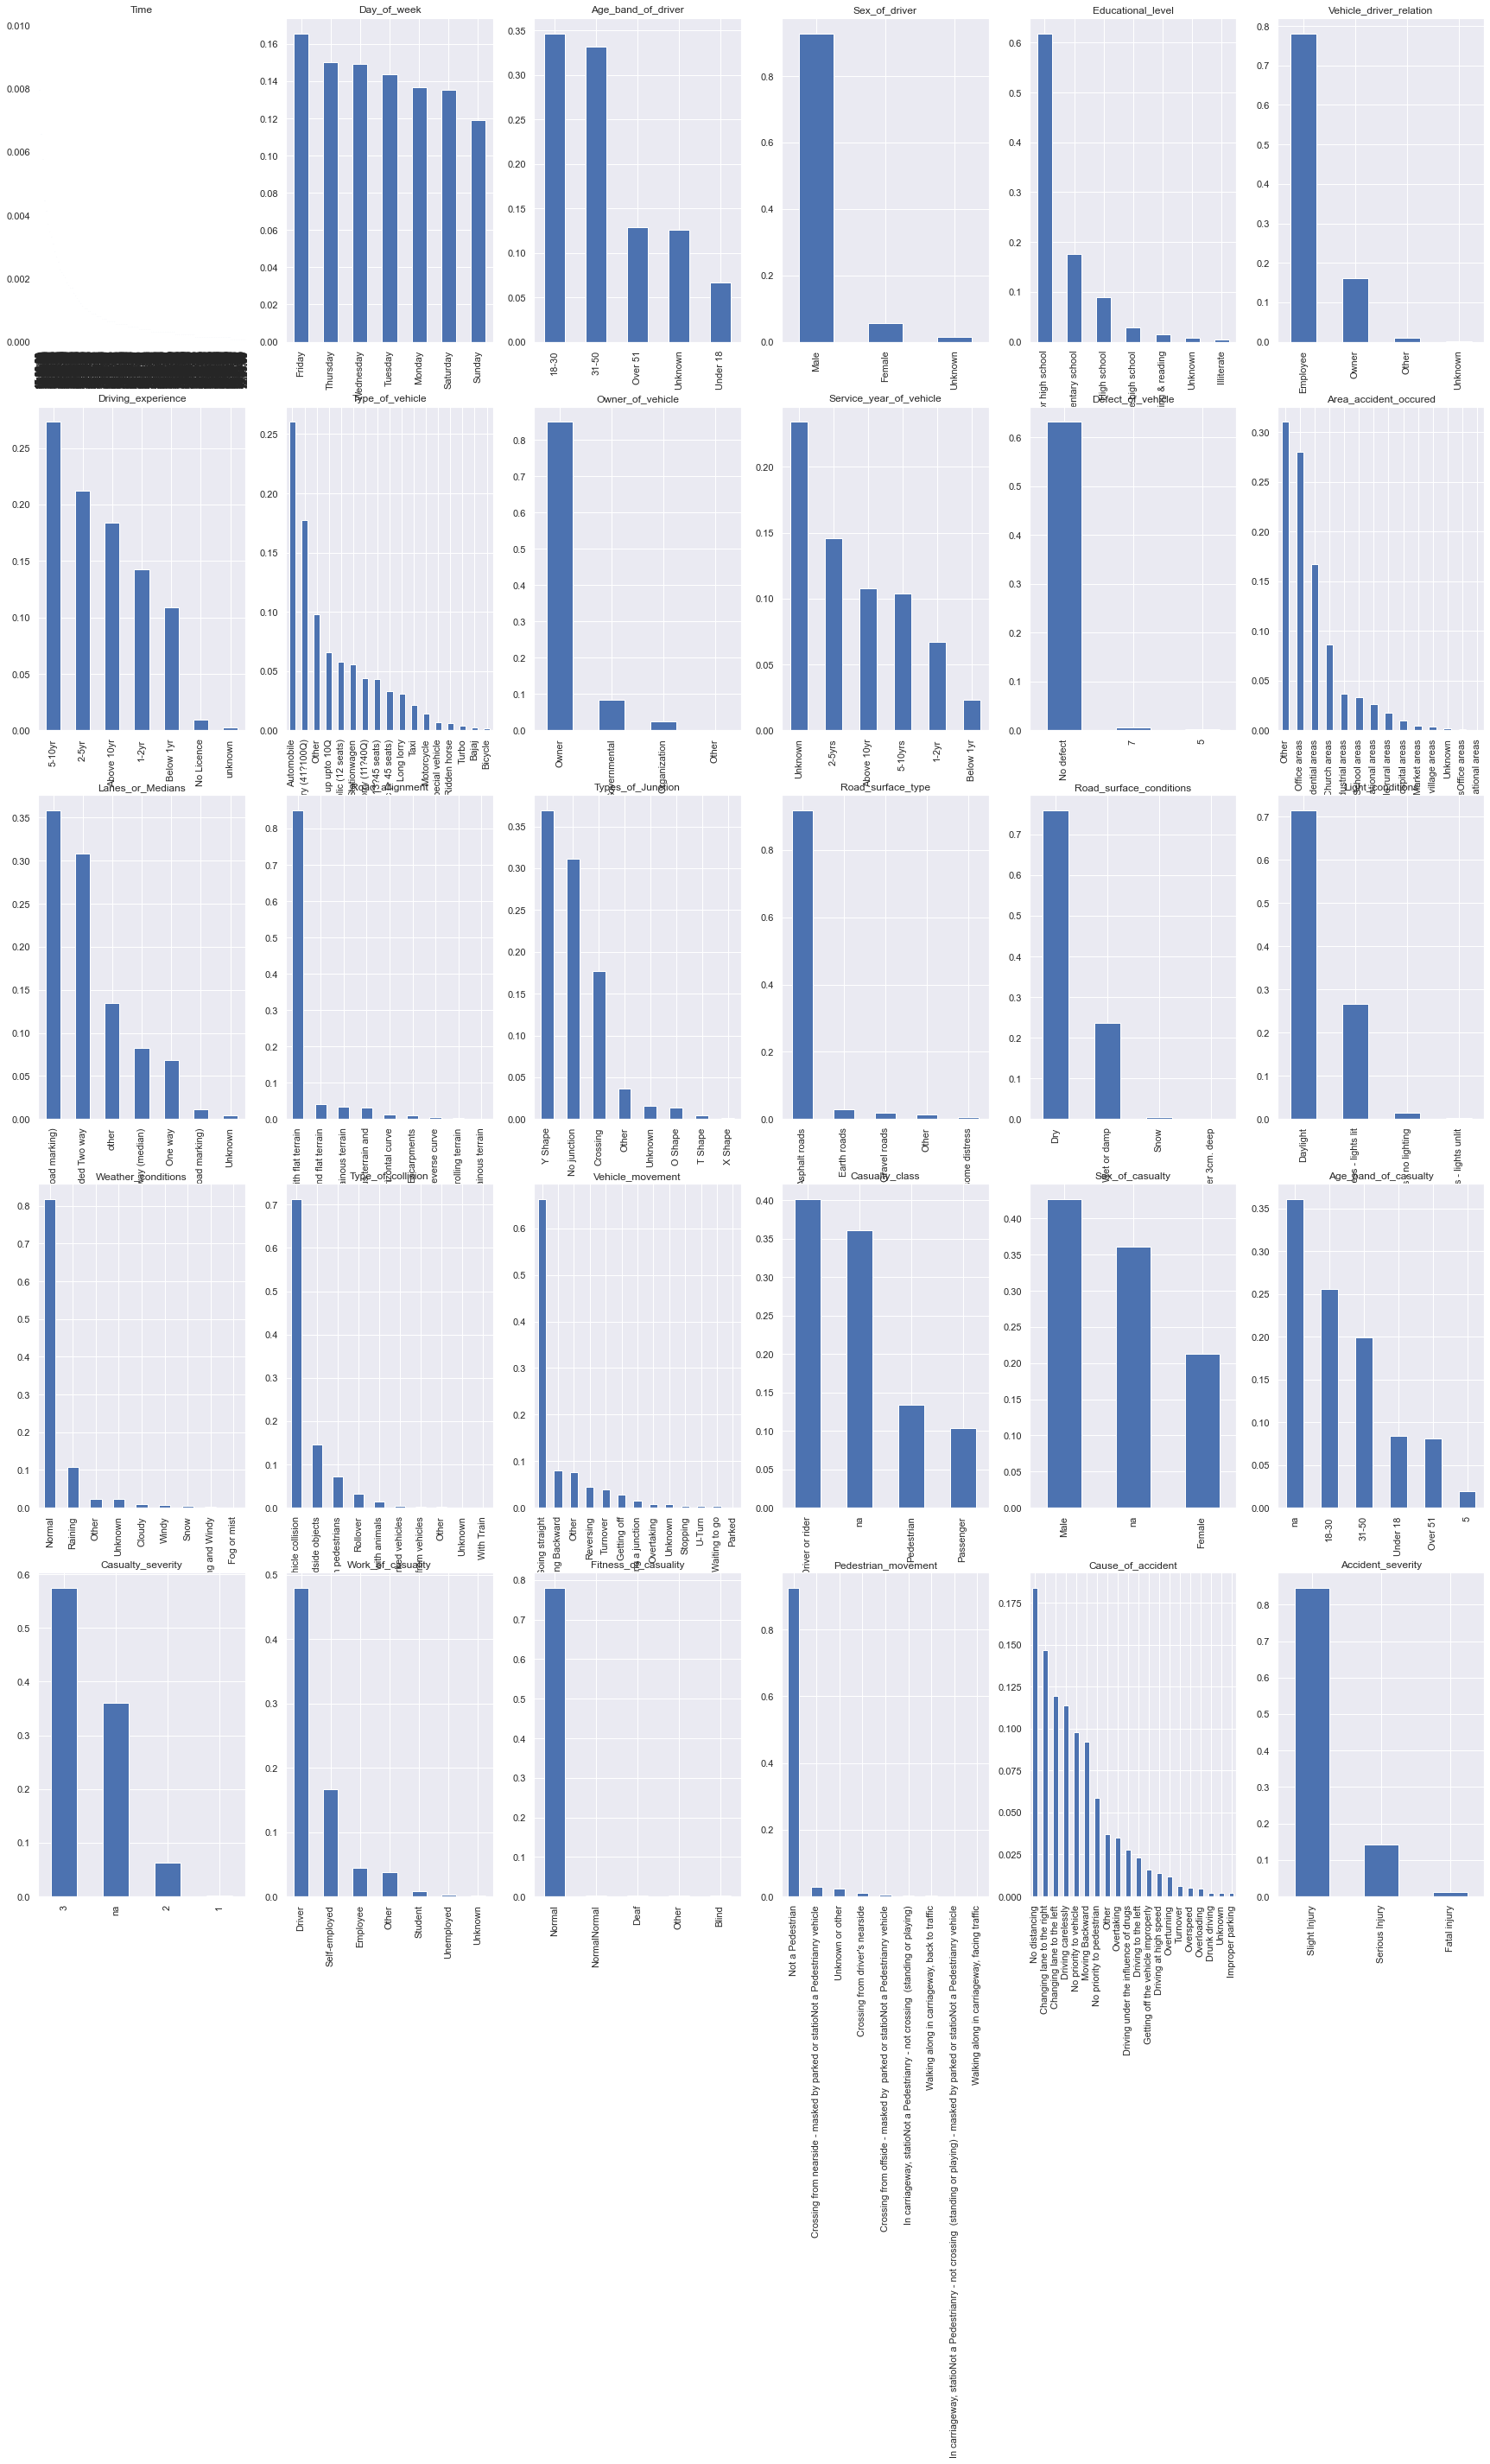

In [10]:
# Check distribution of categorical features
records = len(df)
df_obj, df_num = feat_typ(df)
fig, axes = plt.subplots(5, 6, figsize = (30, 40))
axe = axes.ravel()
for i, c in enumerate(df_obj.columns):
    (df_obj[c].value_counts()/records).sort_values(ascending=False).plot(kind = 'bar', ax = axe[i], title = c)
plt.show()

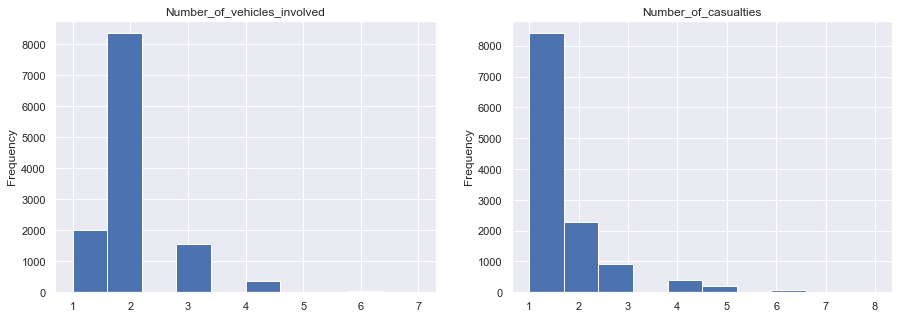

In [11]:
# Check distribution of numeric features
df_obj, df_num = feat_typ(df)
fig, axes = plt.subplots(1, 2, figsize = (15, 5))
axe = axes.ravel()
for i, c in enumerate(df_num.columns):
    df_num[c].plot(kind = 'hist', ax = axe[i], title = c)
plt.show()

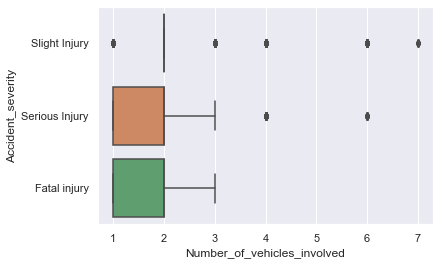

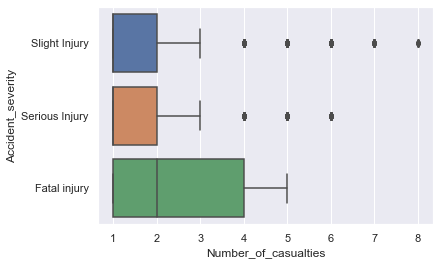

In [12]:
df_obj, df_num = feat_typ(df)
for c in df_num.columns:
    sns.boxplot(y = 'Accident_severity', x = c, data=df)
    plt.show()

In [13]:
df.groupby('Age_band_of_driver')['Educational_level'].value_counts()

Age_band_of_driver  Educational_level 
18-30               Junior high school    2615
                    Elementary school      736
                    High school            377
                    Above high school      150
                    Writing & reading       72
                    Unknown                 33
                    Illiterate              17
31-50               Junior high school    2517
                    Elementary school      740
                    High school            379
                    Above high school      113
                    Writing & reading       53
                    Unknown                 36
                    Illiterate              11
Over 51             Junior high school     974
                    Elementary school      281
                    High school            151
                    Above high school       44
                    Unknown                 17
                    Writing & reading       14
                    I

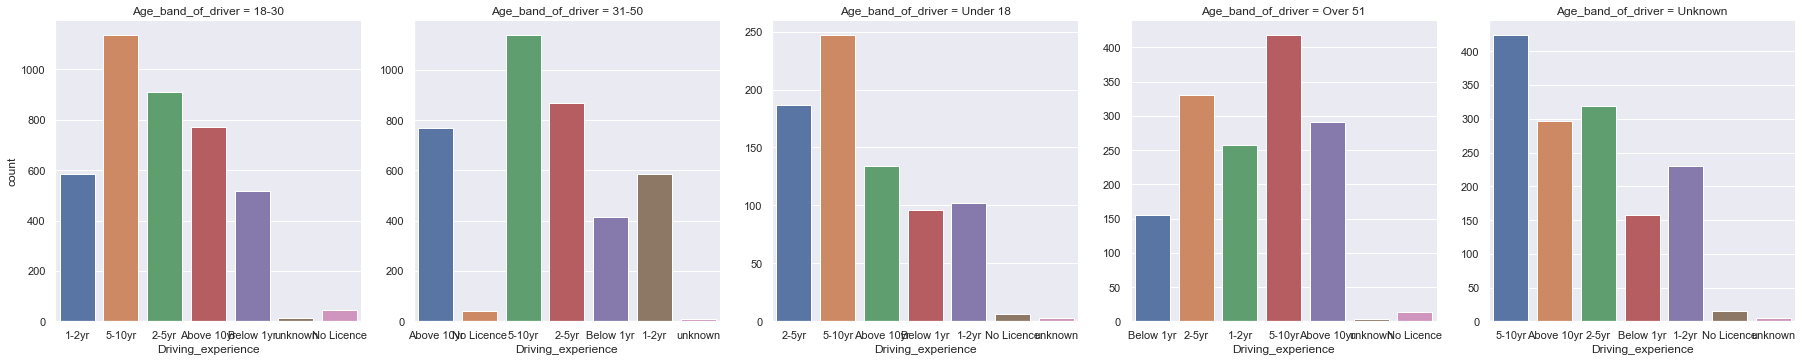

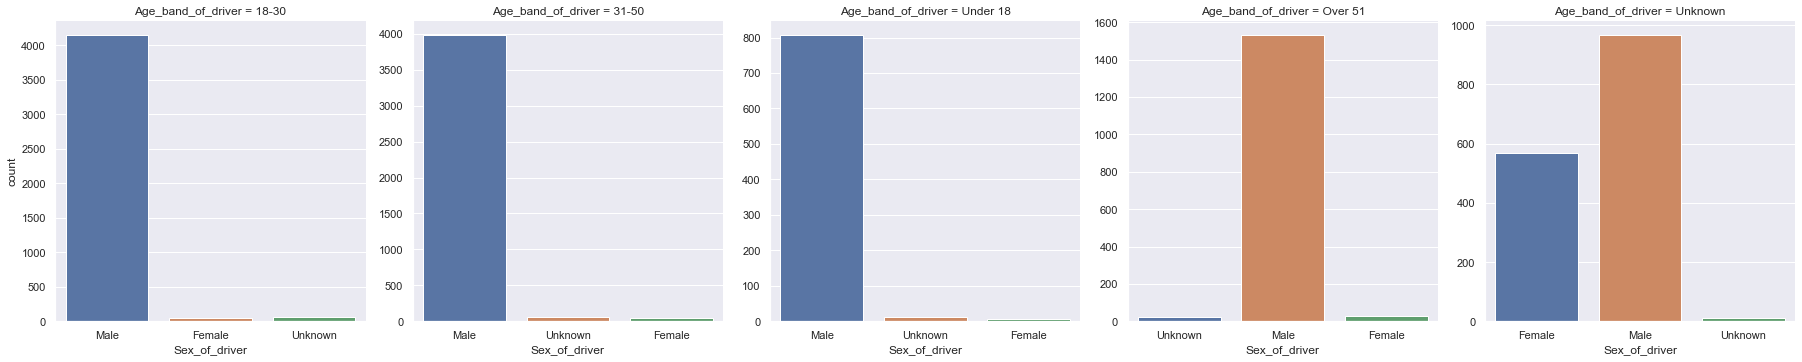

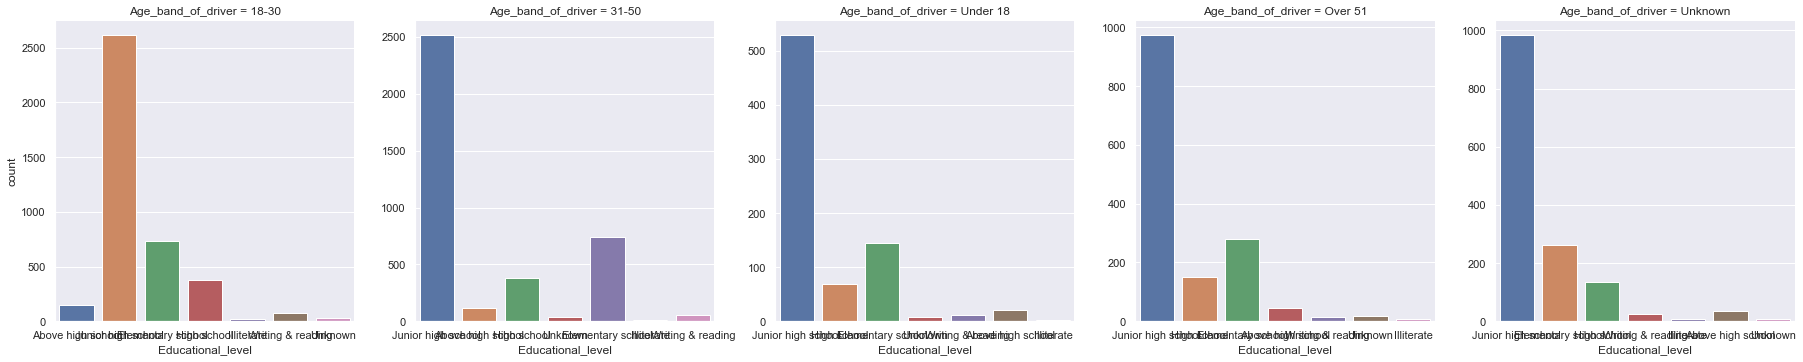

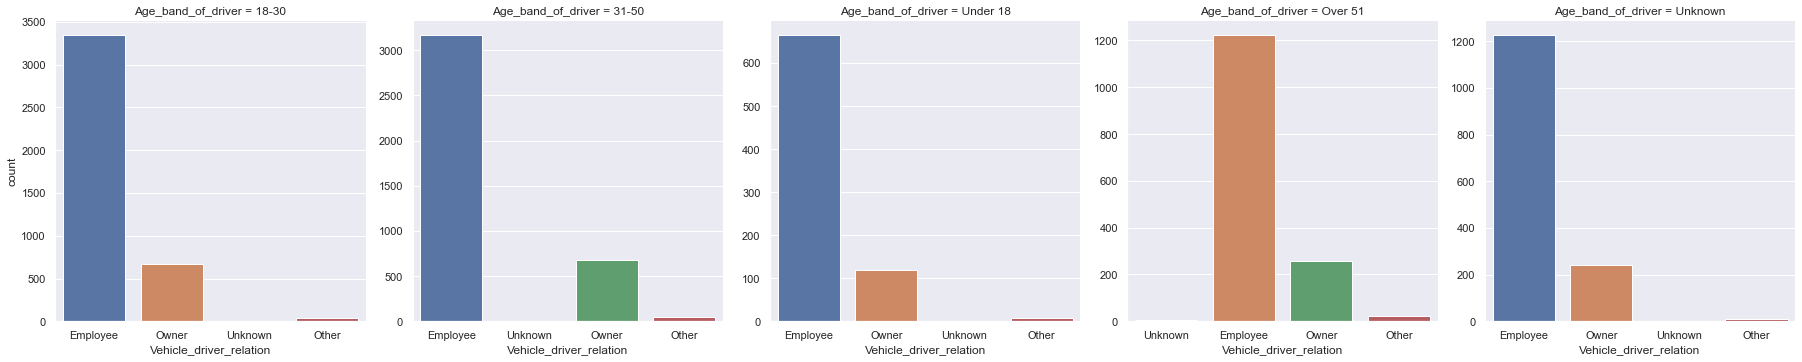

In [14]:
fts = ['Driving_experience',
       'Sex_of_driver',
       'Educational_level',
      'Vehicle_driver_relation']
for i in fts:
    axes=sns.catplot(x = i, kind = 'count', data = df, col = 'Age_band_of_driver',
                sharey = False, sharex = False);

In [15]:
df1 = df.copy()
Time = df['Time']
df1.drop('Time', axis = 1, inplace = True)

**Observations**

- Majority of accidents happened on Friday and drivers involved in most of accidents were male of age group 18 to 30 with driving experience of majority of drivers being 5 to 10 years, most of whom are Employees with Educational level of Junior high school.

- 

### Splitting data into train and test

In [16]:
data = df.copy()

In [17]:
y = data['Accident_severity']
X = data.drop('Accident_severity', axis = 1)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [19]:
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_train (9852, 31)
X_test (2464, 31)
y_train (9852,)
y_test (2464,)


### Data Preprocessing

In [20]:
X_train_1 = X_train.copy()
X_test_1 = X_test.copy()

In [21]:
X_train_2 = X_train.copy()
X_test_2 = X_test.copy()

In [22]:
# Convert Time to datetime
X_train['Time'] = pd.to_datetime(X_train['Time'])
X_test['Time'] = pd.to_datetime(X_test['Time'])
# Create new features from Time
X_train['Hour'] = X_train['Time'].dt.hour
X_test['Hour'] = X_test['Time'].dt.hour
X_train['Minute'] = X_train['Time'].dt.minute
X_test['Minute'] = X_test['Time'].dt.minute
# Drop Time feature
X_train.drop('Time', axis = 1, inplace = True)
X_test.drop('Time', axis = 1, inplace = True)

In [23]:
# Convert Time to datetime
X_train_1['Time'] = pd.to_datetime(X_train_1['Time'])
X_test_1['Time'] = pd.to_datetime(X_test_1['Time'])
# Create new features from Time
X_train_1['Hour'] = X_train_1['Time'].dt.hour
X_test_1['Hour'] = X_test_1['Time'].dt.hour
X_train_1['Minute'] = X_train_1['Time'].dt.minute
X_test_1['Minute'] = X_test_1['Time'].dt.minute
# Drop Time feature
X_train_1.drop('Time', axis = 1, inplace = True)
X_test_1.drop('Time', axis = 1, inplace = True)

In [24]:
# Fill missing values with mode
fts_miss_val = [c for c in X_train_1.isnull().sum()[X_train_1.isnull().sum() != 0].index.tolist()]
for i in fts_miss_val:
    mode = X_train_1[i].mode()[0]
    X_train_1[i].fillna(mode, inplace = True)

In [25]:
# Check missing values in train data after imputation
c = X_train_1.isnull().sum()
p = np.round(100*X_train_1.isnull().sum()/len(df), 2)
pd.concat([c, p], axis = 1, keys = ['counts', '%age'])

,counts,%age
Day_of_week,0,0.0
Age_band_of_driver,0,0.0
Sex_of_driver,0,0.0
Educational_level,0,0.0
Vehicle_driver_relation,0,0.0
Driving_experience,0,0.0
Type_of_vehicle,0,0.0
Owner_of_vehicle,0,0.0
Service_year_of_vehicle,0,0.0
Defect_of_vehicle,0,0.0


Drop Fitness_of_casuality, Pedestrian_movement, Defect_of_vehicle and Road_surface_type as they have just one dominating value for almost 90% of values, thus fairly acting as constants and thus do not add much value to any model.

In [26]:
X_train_1.drop(['Fitness_of_casuality',
              'Pedestrian_movement',
              'Defect_of_vehicle',
              'Road_surface_type'],axis=1,inplace=True)
X_test_1.drop(['Fitness_of_casuality',
             'Pedestrian_movement',
             'Defect_of_vehicle',
             'Road_surface_type'],axis=1,inplace=True)

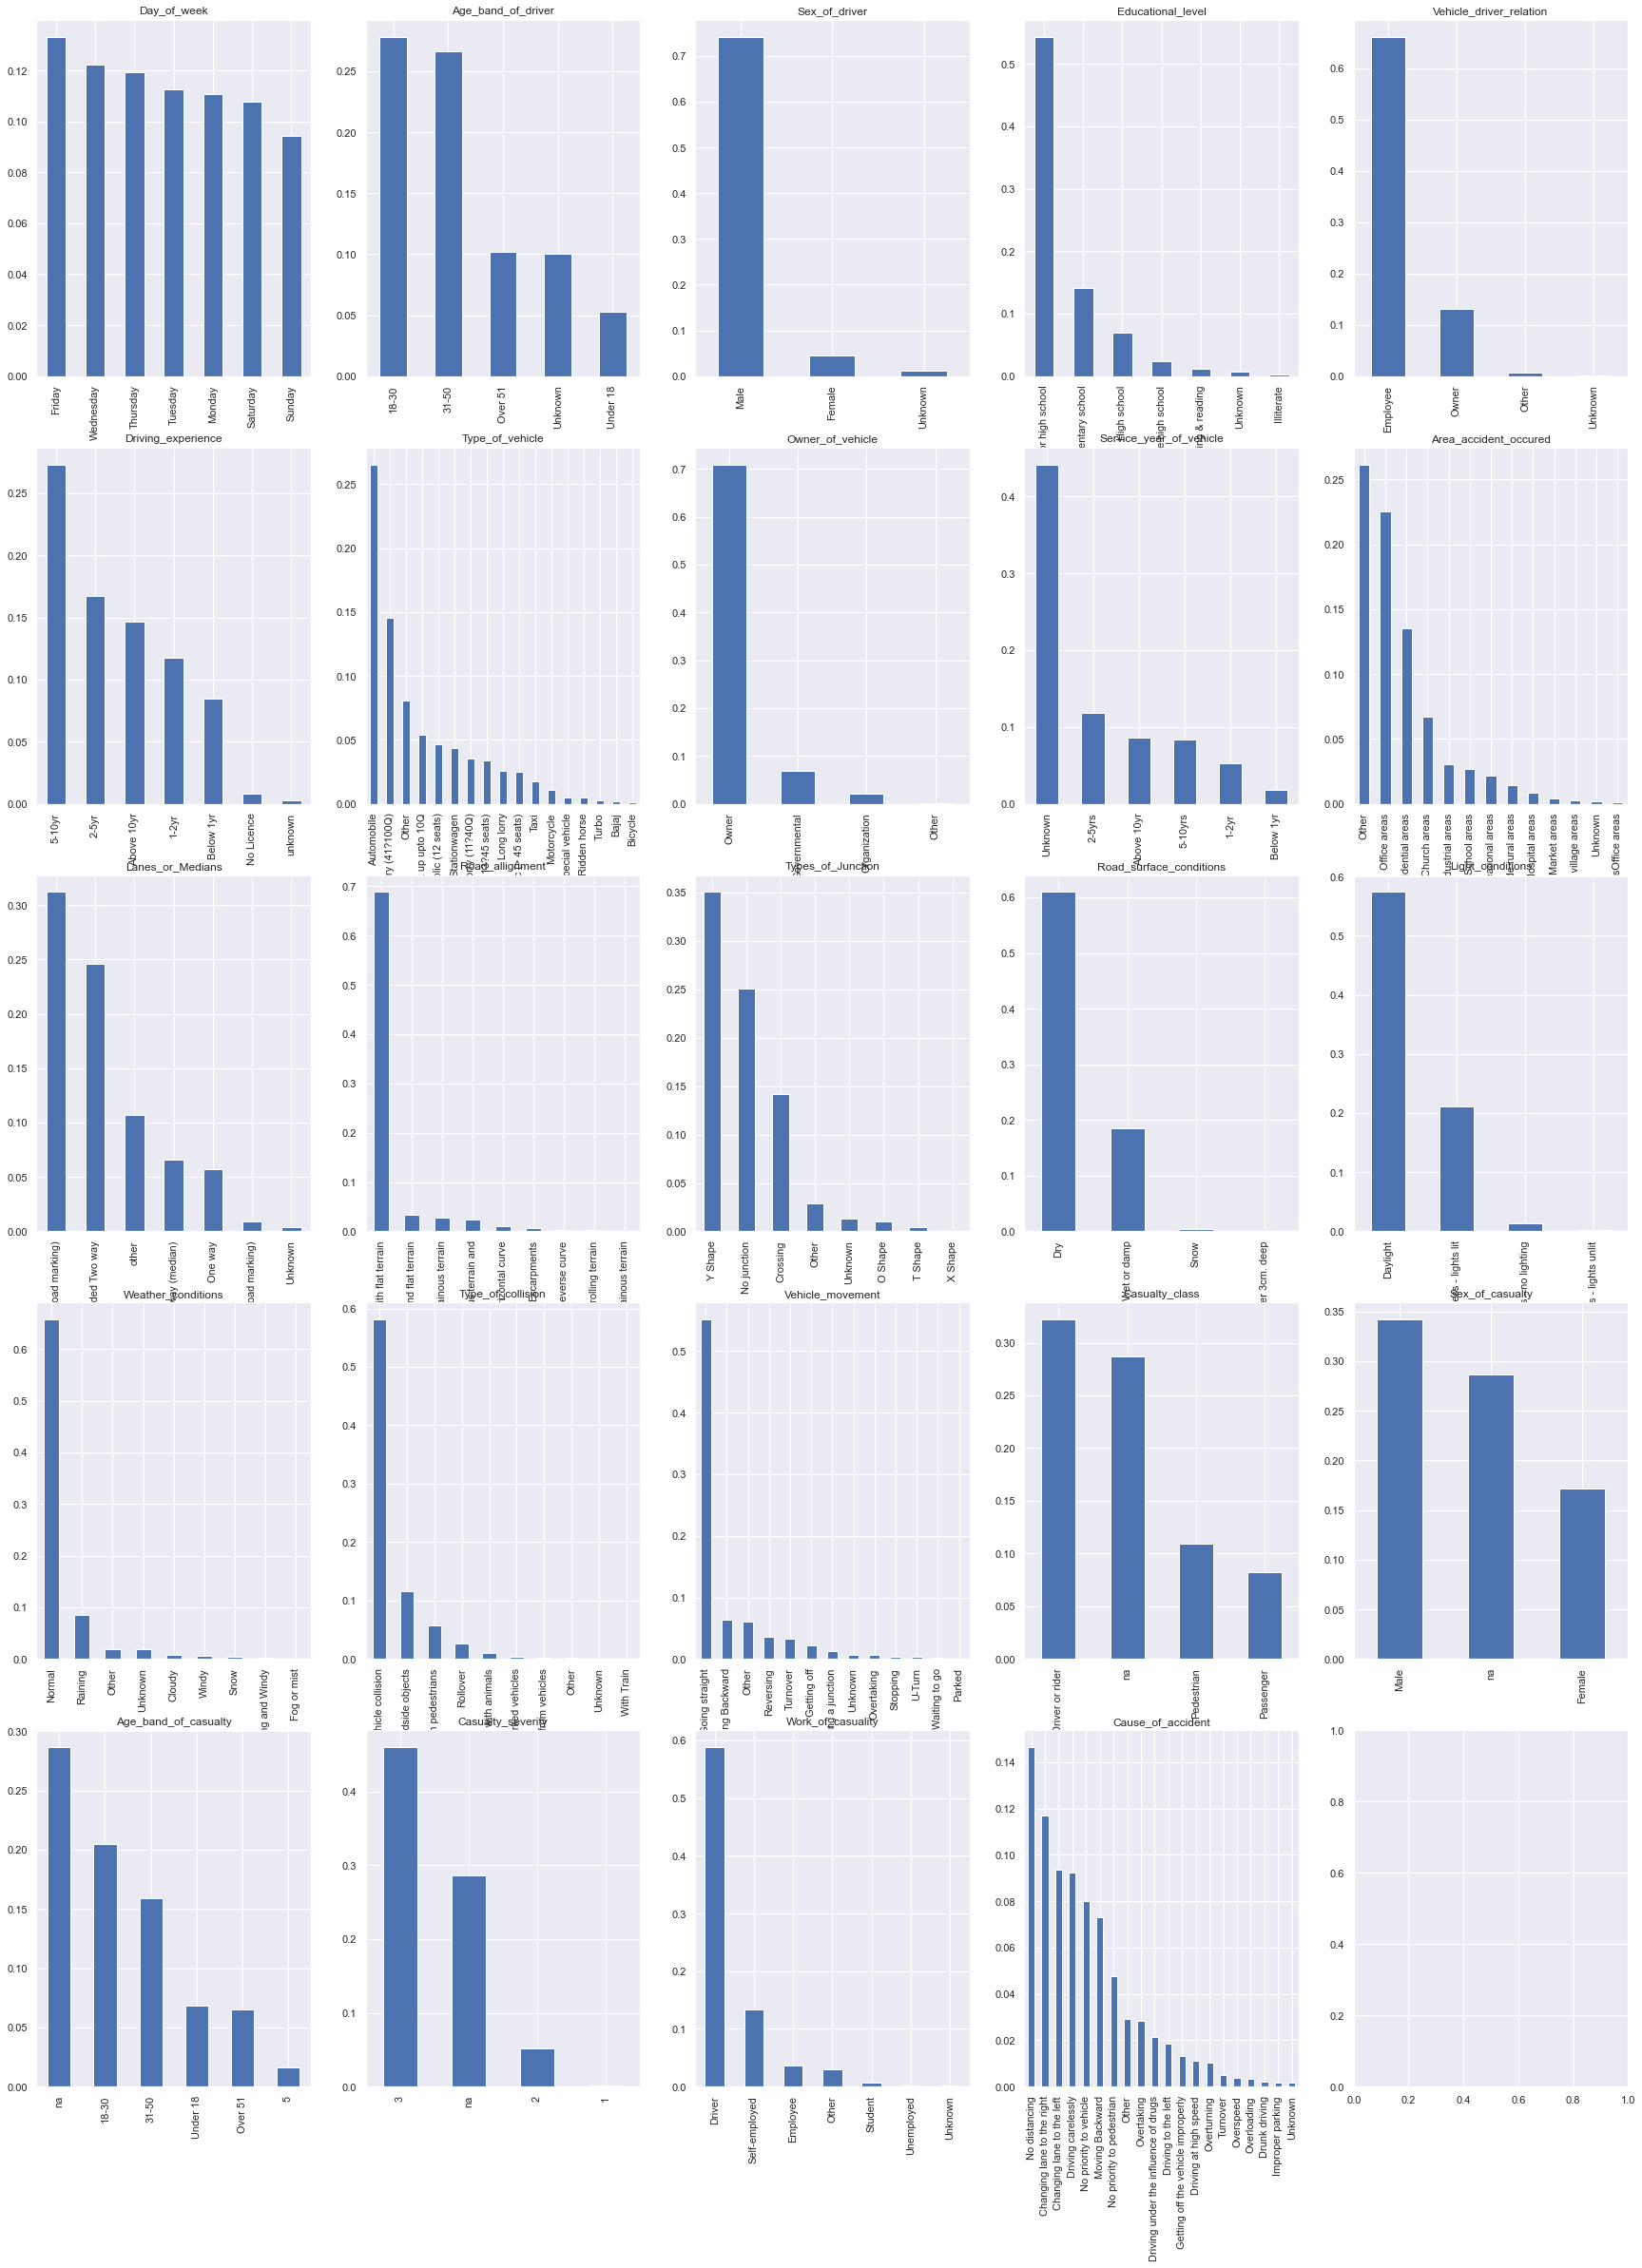

In [27]:
# Check distribution of categorical features after dropping features
records = len(df)
df_obj, df_num = feat_typ(X_train_1)
fig, axes = plt.subplots(5, 5, figsize = (30, 40))
axe = axes.ravel()
for i, c in enumerate(df_obj.columns):
    (df_obj[c].value_counts()/records).sort_values(ascending=False).plot(kind = 'bar', ax = axe[i], title = c)
plt.show()

Even after filling all missing values Casualty_class, Sex_of_casualty, Age_band_of_casualty, Casualty_severity have one of of the categories as na, will replace it with Unknown

In [28]:
# replace na with Unknown in train data
columns = ['Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity']
for c in columns:
    X_train_1[c] = X_train_1[c].replace({'na' : 'Unknown'})

In [29]:
# replace na with Unknown in train data
columns = ['Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity']
for c in columns:
    X_test_1[c] = X_test_1[c].replace({'na' : 'Unknown'})

In [30]:
columns = ['Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity']
for c in columns:
    print(c, X_train_1[c].unique())
    print('-' * 100)

Casualty_class ['Driver or rider' 'Pedestrian' 'Passenger' 'Unknown']
----------------------------------------------------------------------------------------------------
Sex_of_casualty ['Female' 'Male' 'Unknown']
----------------------------------------------------------------------------------------------------
Age_band_of_casualty ['31-50' '18-30' 'Unknown' 'Under 18' 'Over 51' '5']
----------------------------------------------------------------------------------------------------
Casualty_severity ['2' '3' 'Unknown' '1']
----------------------------------------------------------------------------------------------------


In [31]:
# Replace 5 in Age_band_of_casualty in train data
X_train_1['Age_band_of_casualty'] = X_train_1['Age_band_of_casualty'].replace({'5' : 'Unknown'})

In [32]:
# Replace 5 in Age_band_of_casualty in test data
X_test_1['Age_band_of_casualty'] = X_test_1['Age_band_of_casualty'].replace({'5' : 'Unknown'})

Reducing cardinality in data

In [33]:
X_train_1['Type_of_vehicle'] = X_train_1['Type_of_vehicle'].replace(['Lorry (41?100Q)',
 'Pick up upto 10Q',
 'Automobile',
 'Lorry (11?40Q)',
 'Long lorry',
 'Stationwagen',
 'Public (12 seats)',
 'Unknown',
 'Public (13?45 seats)',
 'Other',
 'Taxi',
 'Public (> 45 seats)'], ['Lorry',
 'Lorry',
 'Automobile',
 'Lorry',
 'Lorry',
 'Automobile',
 'Public',
 'Unknown',
 'Public',
 'Other',
 'Other',
 'Public'])

In [34]:
X_test_1['Type_of_vehicle'] = X_test_1['Type_of_vehicle'].replace(['Lorry (41?100Q)',
 'Pick up upto 10Q',
 'Automobile',
 'Lorry (11?40Q)',
 'Long lorry',
 'Stationwagen',
 'Public (12 seats)',
 'Unknown',
 'Public (13?45 seats)',
 'Other',
 'Taxi',
 'Public (> 45 seats)'], ['Lorry',
 'Lorry',
 'Automobile',
 'Lorry',
 'Lorry',
 'Automobile',
 'Public',
 'Unknown',
 'Public',
 'Other',
 'Other',
 'Public'])

In [35]:
X_train_1['Cause_of_accident'].value_counts()

No distancing                           1804
Changing lane to the right              1439
Changing lane to the left               1155
Driving carelessly                      1138
No priority to vehicle                   987
Moving Backward                          898
No priority to pedestrian                588
Other                                    359
Overtaking                               347
Driving under the influence of drugs     265
Driving to the left                      226
Getting off the vehicle improperly       161
Driving at high speed                    138
Overturning                              128
Turnover                                  64
Overspeed                                 48
Overloading                               42
Drunk driving                             24
Improper parking                          22
Unknown                                   19
Name: Cause_of_accident, dtype: int64

In [36]:
X_train_1['Cause_of_accident'] = X_train_1['Cause_of_accident'].replace(['No distancing',
 'Moving Backward',
 'Driving carelessly',
 'Changing lane to the right',
 'Other',
 'Unknown',
 'No priority to vehicle',
 'No priority to pedestrian',
 'Changing lane to the left',
 'Driving to the left',
 'Driving under the influence of drugs',
 'Overtaking'],['No distancing',
 'Moving Backward',
 'Illegal driving',
 'Changing lane',
 'Other',
 'Unknown',
 'Other',
 'Other',
 'Changing lane',
 'Other',
 'Illegal driving',
 'Overtaking'])

In [37]:
X_test_1['Cause_of_accident'] = X_test_1['Cause_of_accident'].replace(['No distancing',
 'Moving Backward',
 'Driving carelessly',
 'Changing lane to the right',
 'Other',
 'Unknown',
 'No priority to vehicle',
 'No priority to pedestrian',
 'Changing lane to the left',
 'Driving to the left',
 'Driving under the influence of drugs',
 'Overtaking'],['No distancing',
 'Moving Backward',
 'Illegal driving',
 'Changing lane',
 'Other',
 'Unknown',
 'Other',
 'Other',
 'Changing lane',
 'Other',
 'Illegal driving',
 'Overtaking'])

In [38]:
le = LabelEncoder()
cols = list(X_train_1.columns)
for c in cols:
    X_train_1[c] = le.fit_transform(X_train_1[c])
    X_test_1[c] = le.fit_transform(X_test_1[c])

In [40]:
X_train_1.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Area_accident_occured,...,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Cause_of_accident,Hour,Minute
6068,1,4,1,4,0,1,3,3,5,7,...,0,2,0,0,1,1,0,7,8,45
5981,3,0,1,4,0,2,3,3,5,6,...,0,2,2,0,0,1,3,6,17,30
10572,0,0,1,1,0,2,0,3,3,7,...,0,4,1,0,1,1,0,4,22,5
4862,3,0,1,1,0,0,3,3,5,2,...,0,1,0,1,0,2,0,0,22,15
5016,4,4,1,4,0,2,0,3,5,8,...,1,2,0,1,0,2,0,8,13,32


In [41]:
standardizer = StandardScaler()
logit = LogisticRegression(class_weight = 'balanced', random_state = 42, multi_class = 'multinomial')
pipeline = make_pipeline(standardizer, logit)
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 27)
# Conduct k fold cross validation
cv_results = cross_val_score(pipeline,
                            X_train_1,
                            y_train,
                            cv = skf,
                            scoring = 'f1_weighted',
                            n_jobs = -1)
cv_results.mean()

0.5842902025276142

In [64]:
xgb = XGBClassifier()
pipeline = make_pipeline(xgb)
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 27)
# Conduct k fold cross validation
cv_results = cross_val_score(pipeline,
                            X_train_1,
                            y_train,
                            cv = skf,
                            scoring = 'f1_weighted',
                            n_jobs = -1)
cv_results.mean()

0.812651546929915

In [43]:
lgb = LGBMClassifier()
pipeline = make_pipeline(lgb)
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 27)
# Conduct k fold cross validation
cv_results = cross_val_score(pipeline,
                            X_train_1,
                            y_train,
                            cv = skf,
                            scoring = 'f1_weighted',
                            n_jobs = -1)
cv_results.mean()

0.8038122490679115

In [44]:
lgb = LGBMClassifier(class_weight = 'balanced')
pipeline = make_pipeline(lgb)
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 27)
# Conduct k fold cross validation
cv_results = cross_val_score(pipeline,
                            X_train_1,
                            y_train,
                            cv = skf,
                            scoring = 'f1_weighted',
                            n_jobs = -1)
cv_results.mean()

0.7745713508337091

In [45]:
etc = ExtraTreesClassifier()
pipeline = make_pipeline(etc)
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 27)
# Conduct k fold cross validation
cv_results = cross_val_score(pipeline,
                            X_train_1,
                            y_train,
                            cv = skf,
                            scoring = 'f1_weighted',
                            n_jobs = -1)
cv_results.mean()

0.7835301660164855

In [46]:
etc = ExtraTreesClassifier(class_weight = 'balanced')
pipeline = make_pipeline(etc)
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 27)
# Conduct k fold cross validation
cv_results = cross_val_score(pipeline,
                            X_train_1,
                            y_train,
                            cv = skf,
                            scoring = 'f1_weighted',
                            n_jobs = -1)
cv_results.mean()

0.7814760996748411

In [47]:
ctb = CatBoostClassifier()
pipeline = make_pipeline(ctb)
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 27)
# Conduct k fold cross validation
cv_results = cross_val_score(pipeline,
                            X_train_1,
                            y_train,
                            cv = skf,
                            scoring = 'f1_weighted',
                            n_jobs = -1)
cv_results.mean()

0.7989690975964596

In [48]:
# Checking the performance of an ensemble of XG Boost, LGBM and catboost classifiers
clf1 = XGBClassifier(random_state = 27)
clf2 = LGBMClassifier(random_state = 27)
clf3 = CatBoostClassifier(random_state = 27)
vclf = VotingClassifier(estimators = [('XGB',clf1), ('LGB',clf2), ('CTB',clf3)], voting = 'soft', weights = [1,2,1])
pipeline = make_pipeline(vclf)
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 27)
# Conduct k fold cross validation
cv_results = cross_val_score(pipeline,
                            X_train_1,
                            y_train,
                            cv = skf,
                            scoring = 'f1_weighted',
                            n_jobs = -1)
cv_results.mean()

0.8042392936478407

###### XGBClassifier is giving the best score. So using it to predict on test data.

### Hyperparameter Tune Classifiers

In [82]:
y_train = y_train.map({'Slight Injury' : 1, 'Serious Injury' : 2, 'Fatal injury' : 3})
y_test = y_test.map({'Slight Injury' : 1, 'Serious Injury' : 2, 'Fatal injury' : 3})

In [77]:
xgb = XGBClassifier(min_child_weight = 1, max_depth = 9, gamma = 0.4)
xgb.fit(X_train_1, y_train)

[14:18:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0.4, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=9, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [78]:
y_pred = xgb.predict(X_test_1)

In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.86      0.99      0.92      2084
           2       0.60      0.12      0.20       349
           3       1.00      0.16      0.28        31

    accuracy                           0.85      2464
   macro avg       0.82      0.42      0.47      2464
weighted avg       0.83      0.85      0.81      2464



In [80]:
y_test = y_test.map({'Slight Injury' : 1, 'Serious Injury' : 2, 'Fatal injury' : 3})